# Exploring Future Earnings Based on College Majors

In this notebook, we'll find out which college majors predict high or low earnings in the future. The dataset we're going to use for this was released by the American Community Survey and cleaned by FiveThirtyEight. It can be downloaded on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). It contains data on the job outcomes of students who have graduated from college between 2010 and 2012. Some of the feautured variables for every major are the number of employed graduates, the share of women, the number of graduates in full-time jobs, and the earnings. <br>
Let's investigate the data using explorative analysis in the form of simple visualizations and answer these questions:
1. Do students in more popular majors make more money?
2. Does the share of women in a major predict income?
2. Which majors are predominantly female/male?
4. Which category of majors earns graduates the most money?

## 1. Preparations

### 1.1 Libraries

__Imports__

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

# use jupyter magic to display plots inline
%matplotlib inline

__Plot Settings__

In [356]:
# Define the overall style template for all plots
plt.style.use("seaborn-dark-palette")

### 1.2 Data

__Import__

In [357]:
majors = pd.read_csv("recent-grads.csv")

__Summary__

In [358]:
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [359]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [360]:
majors.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


__Cleaning__

In [361]:
# Set "Rank" column as the index
majors = majors.set_index("Rank")

In [362]:
n_rows_before = majors.shape[0]
# Drop na values
majors = majors.dropna()
n_rows_after = majors.shape[0]

print("n_rows before: {}\nn_rows after: {}".format(n_rows_before, n_rows_after))

n_rows before: 173
n_rows after: 172


## 2. Analysis

### 2.1 Do Students in More Popular Majors Make More Money?

Let's write a function for our explorative analyses including a scatterplot and a correlation measure.

In [363]:
def explore_correlation(x, y, xlabel, ylabel, title,
                        data = majors,  width = 5, height = 5):
    
    # Create fig and ax object
    fig, ax = plt.subplots(figsize=(width,height))
    
    # Plot the data
    ax.scatter(data[x], data[y])
    
    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    plt.show()
    
    # Print correlation
    
    print(majors[[x, y]].corr())
    

Let's explore some of the data.

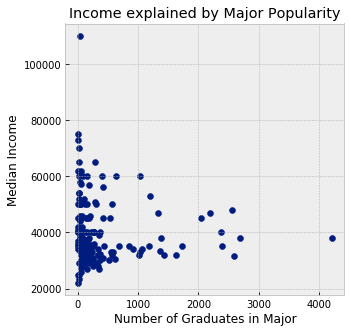

             Sample_size    Median
Sample_size     1.000000 -0.064475
Median         -0.064475  1.000000


In [364]:
explore_correlation("Sample_size", "Median", 
                    title = "Income explained by Major Popularity",
                    xlabel = "Number of Graduates in Major", 
                    ylabel = "Median Income")

The data indicate that Income and Major Popularity are not correlated. Economic theory would suggest that most people would pick the majors that will earn them the most money later. That, in turn, would lead to an increase in supply of graduates which would reduce salaries. This would mean that there are two kinds of linear relationships that clanced out each others effects. Therefore, it would be wrong to say Income and Major Popularity are not connected in a non-linear way.

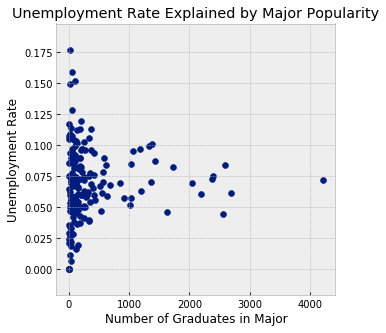

                   Sample_size  Unemployment_rate
Sample_size           1.000000           0.062955
Unemployment_rate     0.062955           1.000000


In [365]:
explore_correlation("Sample_size", "Unemployment_rate", 
                    title = "Unemployment Rate Explained by Major Popularity",
                    xlabel = "Number of Graduates in Major", 
                    ylabel = "Unemployment Rate")

Here, we find another correlation close to zero. This can be explained by the same mechanism described before. It seems like choosing your major based on popularity alone is neither a good nor a bad decision.

### 2.2 Does the Share of Women in a Major Predict Low Income?

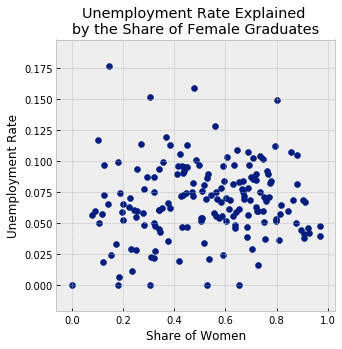

                   ShareWomen  Unemployment_rate
ShareWomen           1.000000           0.073205
Unemployment_rate    0.073205           1.000000


In [366]:
explore_correlation("ShareWomen", "Unemployment_rate", 
                    title = "Unemployment Rate Explained \nby the Share of Female Graduates",
                    xlabel = "Share of Women", 
                    ylabel = "Unemployment Rate")

It doesn't seem like male dominated majors have a lower unemployment rate than those dominated by females. We'll find out more about the share of women in different majors later.

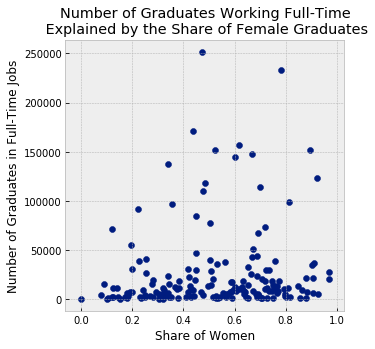

            ShareWomen  Full_time
ShareWomen      1.0000     0.1202
Full_time       0.1202     1.0000


In [367]:
explore_correlation("ShareWomen", "Full_time", 
                    title = "Number of Graduates Working Full-Time\n Explained by the Share of Female Graduates",
                    xlabel = "Share of Women", 
                    ylabel = "Number of Graduates in Full-Time Jobs")

We tend to think of male dominated Majors as being adventageous on the job market. However, there is a small __positive__ correlation between high rates of female graduates and full-time employment. Maybe this is because most part time jobs are found in scientific research, which might be dominated by men. We can't figure that out with our data, unfortunately.

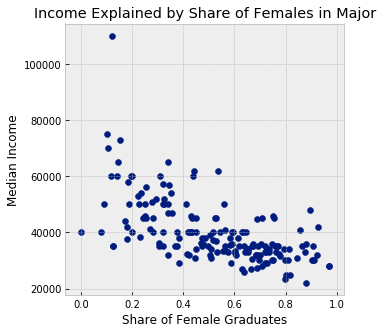

            ShareWomen   Median
ShareWomen     1.00000 -0.61869
Median        -0.61869  1.00000


In [368]:
explore_correlation("ShareWomen", "Median", 
                    title = "Income Explained by Share of Females in Major",
                    xlabel = "Share of Female Graduates", 
                    ylabel = "Median Income")

There is a strong negative correlation with shar eof female graduates and median income. 37.7 % of differences in median outcome are explained by this factor. Possible reasons for this are:
1. high demand for male dominated majors
2. individual differences in job choice and salary negotiation between men and women
3. negative prejudice against women

### 2.3 Which Majors Are Predominantly Male/Female?

__Distribution__

Let's have a look at the distribution of the shae of women first.

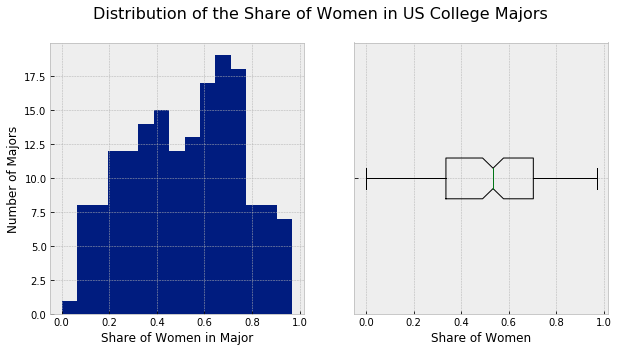

In [369]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(majors["ShareWomen"], bins = 15)
ax1.set_xlabel("Share of Women in Major")
ax1.set_ylabel("Number of Majors")


ax2.boxplot(majors["ShareWomen"], notch = True, vert = False)
ax2.set_yticklabels("")
ax2.set_xlabel("Share of Women")

fig.suptitle("Distribution of the Share of Women in US College Majors",
            fontsize = 16)
plt.show()

This looks approximately normally distributed, however with a trend towards more women. Maybe the distribution of the share of women differs between different categories of majors. Let's examine this for the 4 largest categories.

In [370]:
top_4_categories = majors["Major_category"].value_counts()[:4]
top_4_categories

Engineering                  29
Education                    16
Humanities & Liberal Arts    15
Biology & Life Science       14
Name: Major_category, dtype: int64

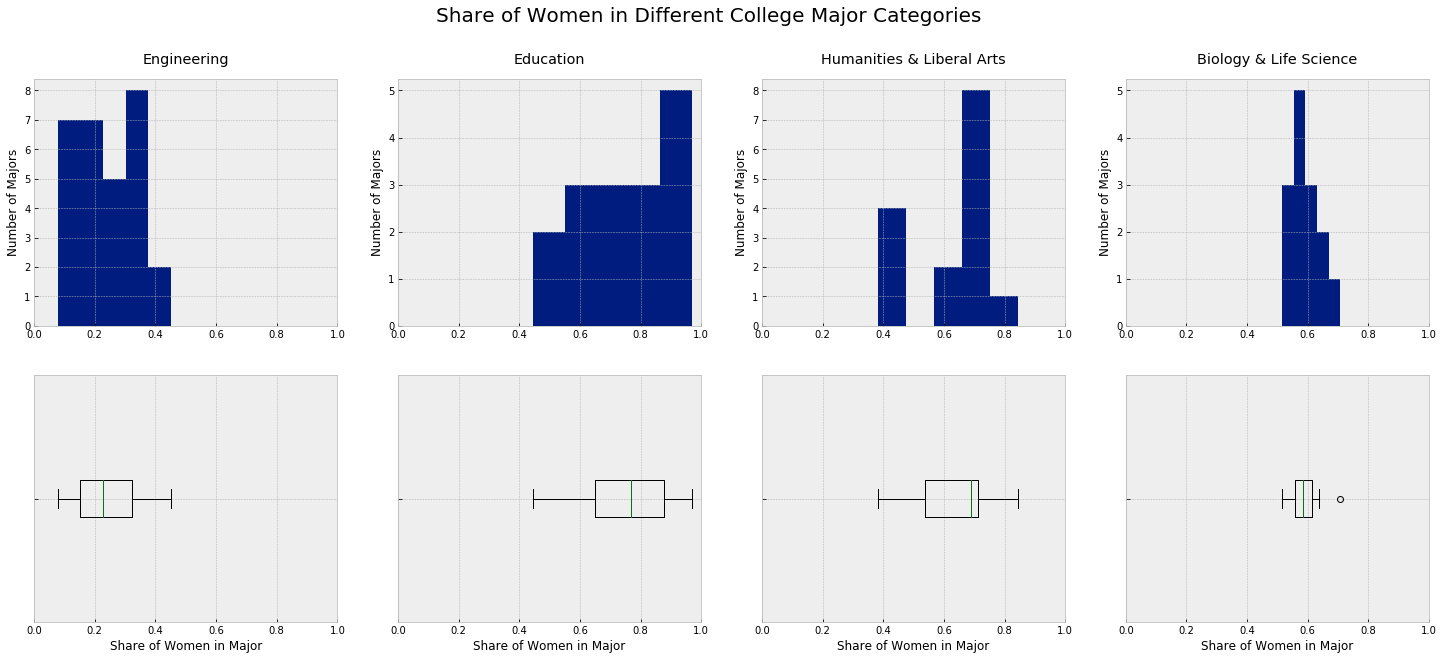

In [371]:
fig, ax = plt.subplots(2,4, figsize=(25,10))

for i, category in enumerate(top_4_categories.index):
    
    category_data = majors[majors["Major_category"] == category]
    
    ax[0,i].hist(category_data["ShareWomen"], bins = 5)
    ax[0,i].set_title(category, pad = 15)
    ax[0,i].set_ylabel("Number of Majors")
    ax[0,i].set_xlim(0,1)
    
    
    ax[1,i].boxplot(category_data["ShareWomen"], vert = False)
    ax[1,i].set_ylabel("")
    ax[1,i].set_xlabel("Share of Women in Major")
    ax[1,i].set_xlim(0,1)
    ax[1,i].set_yticklabels("")


fig.suptitle("Share of Women in Different College Major Categories", fontsize = 20)

#plt.show()

plt.savefig("share_of_women_major_categories.jpg")

We can see very clearly how the data is still approximately normally distributed in all categories expect for the education category. It also becomes clear that women are in the majority for every category expect for Engineering.

__Which categories have the highest and lowest share of women?__

In [409]:
# Setup an empty dict, calculate the mean share of women for every category and add it to the dict
mean_share_of_women = {}
all_categories = majors["Major_category"].unique()
for category in all_categories:
    share_of_women = majors.loc[majors["Major_category"] == category, "ShareWomen"]
    mean_share_of_women[category] = share_of_women.mean()

In [410]:
# Convert the dict into a dataframe
share_of_women_df = pd.DataFrame({"major_category" : list(mean_share_of_women.keys()),
             "share_of_women" : list(mean_share_of_women.values())})
share_of_women_df.head()

,major_category,share_of_women
0,Engineering,0.238889
1,Business,0.483198
2,Physical Sciences,0.508683
3,Law & Public Policy,0.483649
4,Computers & Mathematics,0.311772


In [535]:
share_of_women_sorted = share_of_women_df.sort_values(by = ["share_of_women"])

In [536]:
top_three = share_of_women_sorted.iloc[-3:]
top_three

,major_category,share_of_women
15,Interdisciplinary,0.770901
13,Psychology & Social Work,0.794397
7,Health,0.795152


In [537]:
bottom_three = share_of_women_sorted.iloc[:3]
bottom_three

,major_category,share_of_women
0,Engineering,0.238889
4,Computers & Mathematics,0.311772
5,Industrial Arts & Consumer Services,0.349523


Now that we've examined how the share of women differes between categories of majors, we can look at the implications of this. We have seen before that the share of women is negatively correlated with income. Maybe that is because the top 3 majors for women come with a lower income than the top 3 majors for men. Let's find out. 

### 2.4 Which Category of Majors Earns Graduates the Most Money?

In [538]:
# Setup an empty dict, calculate the mean income for every category and add it to the dict
mean_income = {}
all_categories = majors["Major_category"].unique()
for category in all_categories:
    income = majors.loc[majors["Major_category"] == category, "Median"]
    mean_income[category] = income.mean()

In [539]:
# Convert the dict into a dataframe
income_df = pd.DataFrame({"major_category" : list(mean_income.keys()),
             "median_income" : list(mean_income.values())})
income_df.head()

,major_category,median_income
0,Engineering,57382.758621
1,Business,43538.461538
2,Physical Sciences,41890.000000
3,Law & Public Policy,42200.000000
4,Computers & Mathematics,42745.454545


In [540]:
income_df_sorted = income_df.sort_values(by = ["median_income"])

In [541]:
top_three = income_df.iloc[:3]
top_three

,major_category,median_income
0,Engineering,57382.758621
1,Business,43538.461538
2,Physical Sciences,41890.000000


In [542]:
bottom_three = income_df.iloc[-3:]
bottom_three

,major_category,median_income
13,Psychology & Social Work,30100.0
14,Communications & Journalism,34500.0
15,Interdisciplinary,35000.0


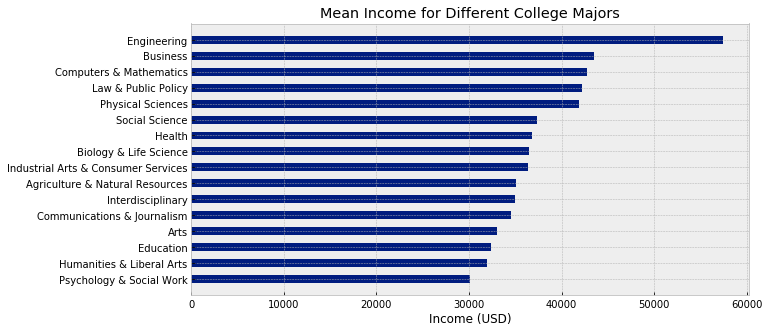

In [543]:
fig, ax = plt.subplots(figsize=(10,5))

height = 0.5
x = income_df_sorted["median_income"]
y = income_df_sorted["major_category"]

ax.barh(y, x, height)
ax.set_title("Mean Income for Different College Majors")
ax.set_xlabel("Income (USD)")

plt.show()

If you want to pick a college major and want a high salary, you should aim at programs in the fields of engineering,business, Computers & Mathematics, Law & Public Policy, or the Physical Sciences. Those are going to grant you a salary of over 40,000 USD on average.

Now, let's find out one last thing. We found that majors with a high share of women were correlated with low income. We should plot the share of women alongside the income to find out more about this. For that, we need to merge the share_of_women df and the income_df.

In [544]:
income_and_gender_df = pd.DataFrame({"category" : all_categories,
                                    "median_income" : income_df["median_income"],
                                    "share_of_women" : share_of_women_df["share_of_women"]})
income_and_gender_df.head()

,category,median_income,share_of_women
0,Engineering,57382.758621,0.238889
1,Business,43538.461538,0.483198
2,Physical Sciences,41890.000000,0.508683
3,Law & Public Policy,42200.000000,0.483649
4,Computers & Mathematics,42745.454545,0.311772


To display the median_income and share_of_women column together in one plot, we need to normalize the values.

In [545]:
income_and_gender_df["median_income"] = income_and_gender_df["median_income"] / 57382.758621 # highest income value
income_and_gender_df["share_of_women"] = income_and_gender_df["share_of_women"] / 0.795152 # highest share of women

Great! Now we can sort the dataframe and then plot it.

In [546]:
income_and_gender_df_sorted = income_and_gender_df.sort_values(by = ["median_income"])

In [547]:
import numpy as np

c:\users\maxhi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


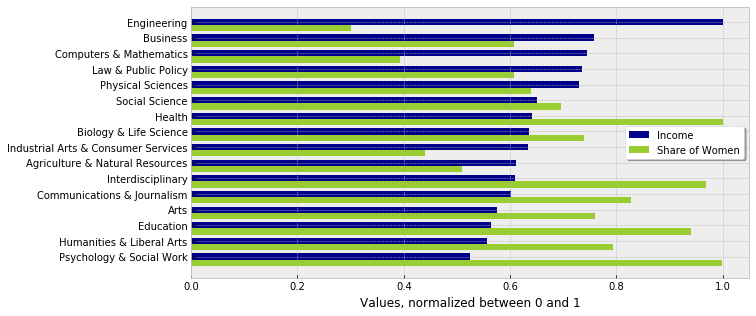

In [579]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

height = 0.4
x1 = income_and_gender_df_sorted["median_income"]
x2 = income_and_gender_df_sorted["share_of_women"]
y = income_df_sorted["major_category"]

r1 = np.arange(len(x1)) + 1
r2 = [i - height for i in r1]

ax1.barh(r1, x1, height, color = "darkblue", label = "Income")
ax2.barh(r2, x2, height, color = "yellowgreen", label = "Share of Women")

categories_sorted = (income_and_gender_df_sorted["category"].values)

ax1.set_yticks(r1)
ax1.set_yticklabels(categories_sorted)
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax1.set_xlabel("Values, normalized between 0 and 1")
plt.legend(loc = "center right", frameon = True, fancybox = True, shadow = True, facecolor = "w")

plt.show()

In this plot, we can clearly see the relationship between the share of women and income. At least part of the reason why women earn less than men on average is because they choose college majors thet will lead to a low income career.

## 3. Conclusion

In this analysis, we have found that:
    1. Major popularity is not correlated with salary or unemployment rate. It shouldn't be taken into considering when deciding for a high paying career.
    2. Studying in a major with a high share of women results in less income. The share of women alone predicts 37% of variance in income.
    3. The highest paying fields are Engineering, Business, and the Physical Sciences. 
    4. Women are underrepresented in high paying fields and overrepresented in low paying fields.

__Thank you all for reading!__